In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\alan.islas\Anaconda3\envs\gmap\lib\site-packages\ipykernel_launcher.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  """


In [6]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Inspect the "Measurement" table structure
inspector = inspect(engine)
columns = inspector.get_columns('measurement')

# Print the column names and their types
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Inspect the "Measurement" table structure
inspector = inspect(engine)
columns = inspector.get_columns('station')

# Print the column names and their types
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date = most_recent_date[0]
print(most_recent_date)

2017-08-23


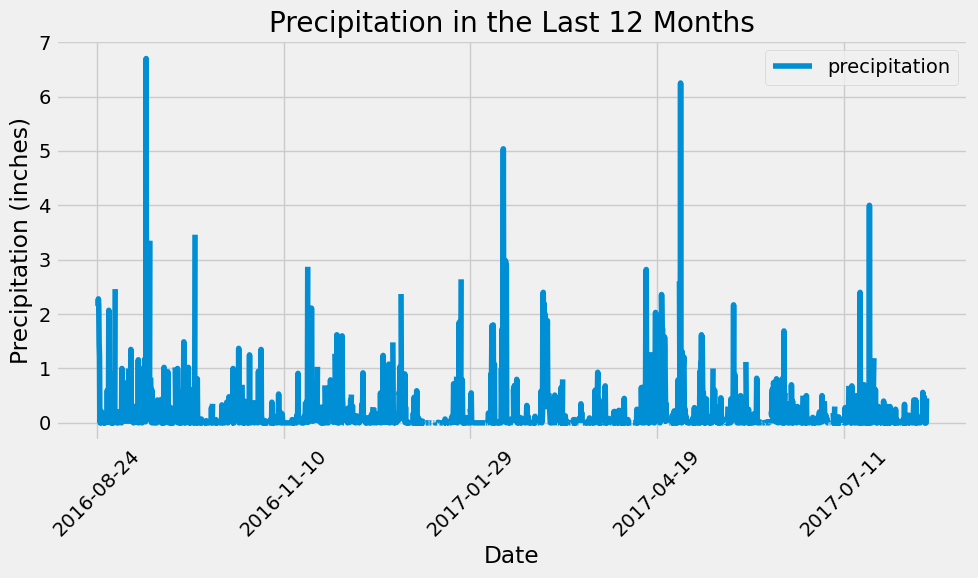

In [12]:
# Design a query to retrieve the last 12 months of precipitation data
# Starting from the most recent data point in the database
query_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
query_date = query_date[0]  # Extract the date value from the query result

# Calculate the date one year from the last date in the dataset
last_year_date = dt.datetime.strptime(query_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores for the last 12 months
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year_date).all()

# Save the query results as a Pandas DataFrame and set column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the DataFrame by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation in the Last 12 Months")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [16]:
result_dict = dict(results)
result_dict


{'2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 

In [94]:
# Use Pandas to calculate the summary statistics for the precipitation data
df[['precipitation']].describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [95]:
# Design a query to calculate the total number of stations in the dataset
# Get data of the column station of the DB Station
query_station = session.query(Station.station)
# Assign to a pandas dataframe
df2 = pd.DataFrame(query_station, columns=['station'])
#count number of stations
df2.station.nunique()

9

In [96]:
# Using sql it can also be done using func.count
# Calculate the total number of stations
station_count = session.query(func.count(Station.station)).scalar()

# Print the total number of stations
print(f"Total number of stations: {station_count}")

Total number of stations: 9


In [97]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Find the most active stations
station_counts = session.query(Measurement.station, func.count(Measurement.id)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.id).desc()).all()

# Print the stations and their counts
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [98]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == 'USC00519281').all()

temperature_stats

[(54.0, 85.0, 71.66378066378067)]

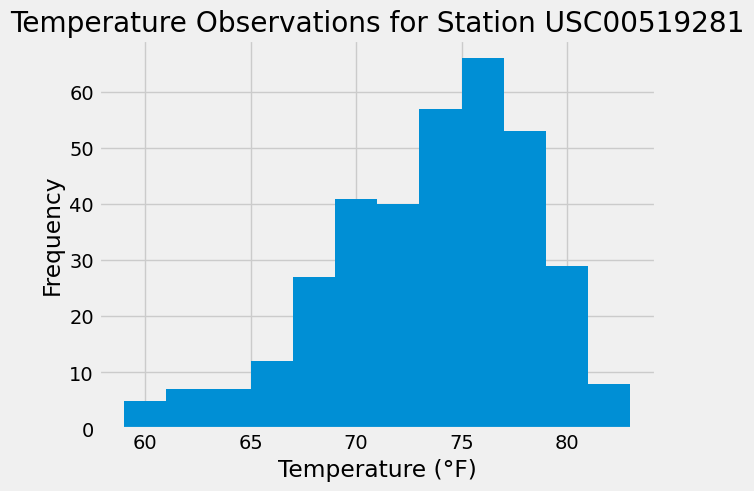

In [99]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Query the maximum date from the "Measurement" table
last_date = session.query(func.max(Measurement.date)).scalar()

# Convert the last date to a datetime object
last_date = dt.datetime.strptime(last_date, '%Y-%m-%d').date()

# Calculate the date one year ago from the last date
last_year_date = last_date - dt.timedelta(days=365)

# Query the temperature observations for the most active station within the last 12 months
temperature_data = session.query(Measurement.date, Measurement.tobs).\
                   filter(Measurement.station == 'USC00519281').\
                   filter(Measurement.date >= last_year_date).all()

df = pd.DataFrame(temperature_data, columns=['date', 'tobs'])

# Plot the histogram
plt.hist(df['tobs'], bins=12)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observations for Station USC00519281')
plt.show()

# Close Session

In [100]:
# Close Session
session.close()

In [103]:
pip install flask

     ------------------------------------ 101.8/101.8 kB 344.3 kB/s eta 0:00:00
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
     -------------------------------------- 233.6/233.6 kB 1.2 MB/s eta 0:00:00
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [104]:
from flask import Flask, jsonify

app = Flask(__name__)

@app.route('/')
def home():
    """Homepage"""
    return (
        f"Welcome to the Homepage<br/><br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/&lt;start&gt;<br/>"
        f"/api/v1.0/&lt;start&gt;/&lt;end&gt;"
    )

@app.route('/api/v1.0/precipitation')
def precipitation():
    """Return the JSON representation of precipitation data"""
    # Perform your query and conversion to a dictionary
    # Replace this with your code to retrieve the last 12 months of precipitation data

    # Return the JSON representation of the dictionary
    return jsonify(precipitation_data)

@app.route('/api/v1.0/stations')
def stations():
    """Return a JSON list of stations"""
    # Perform your query to retrieve the list of stations
    # Replace this with your code to retrieve the stations from the dataset

    # Return the JSON representation of the list
    return jsonify(station_list)

@app.route('/api/v1.0/tobs')
def tobs():
    """Return a JSON list of temperature observations"""
    # Perform your query to retrieve the temperature observations
    # Replace this with your code to retrieve the observations for the most-active station

    # Return the JSON representation of the list
    return jsonify(tobs_list)

@app.route('/api/v1.0/<start>')
def start_date(start):
    """Return a JSON list of temperature statistics for a specified start date"""
    # Perform your query to calculate the temperature statistics for the specified start date
    # Replace this with your code to calculate TMIN, TAVG, and TMAX for the specified start date

    # Return the JSON representation of the statistics
    return jsonify(temperature_stats)

@app.route('/api/v1.0/<start>/<end>')
def start_end_date(start, end):
    """Return a JSON list of temperature statistics for a specified start-end range"""
    # Perform your query to calculate the temperature statistics for the specified start-end range
    # Replace this with your code to calculate TMIN, TAVG, and TMAX for the specified range

    # Return the JSON representation of the statistics
    return jsonify(temperature_stats)
